In [1]:
import Pkg
Pkg.add("DifferentialEquations")

    Updating registry at `C:\Users\Xiaomi\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `C:\Users\Xiaomi\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\Xiaomi\.julia\environments\v1.6\Manifest.toml`


In [2]:
using DifferentialEquations
a = 0.98
f(u,p,t) = a*u
u0 = 1.0
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 5-element Vector{Float64}:
 0.0
 0.10042494449239292
 0.35218603951893646
 0.6934436028208104
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.1034222047865465
 1.4121908848175448
 1.9730384275623003
 2.664456142481452

In [3]:
Pkg.add("Plots")
using Plots

   Resolving package versions...
  No Changes to `C:\Users\Xiaomi\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\Xiaomi\.julia\environments\v1.6\Manifest.toml`


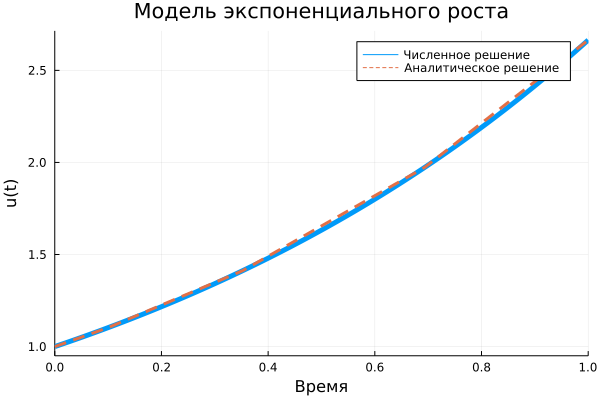

In [4]:
plot(sol, linewidth=5,title="Модель экспоненциального роста", xaxis="Время",yaxis="u(t)",label="Численное решение")
plot!(sol.t, t->1.0*exp(a*t),lw=3,ls=:dash,label="Аналитическое решение")

OrdinaryDiffEq.ODECompositeSolution{Float64, 1, Vector{Float64}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Float64}}, ODEProblem{Float64, Tuple{Float64, Float64}, false, SciMLBase.NullParameters, ODEFunction{false, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing}, Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, CompositeAlgorithm{Tuple{Vern7, Rodas4{0, false, DefaultLinSolve, Val{:forward}}}, OrdinaryDiffEq.AutoSwitchCache{Vern7, Rodas4{0, false, DefaultLinSolve, Val{:forward}}, Rational{Int64}, Int64}}, OrdinaryDiffEq.CompositeInterpolationData{ODEFunction{false, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing}, Vector{Float6

1.7850597254035119, 1.7866925196261598, 1.8209725214838577, 1.839202481202351, 1.940180228142386, 1.995623962735682, 2.0983854147808145, 2.1141785504816952, 2.1433887389506725, 2.1434377058018868], [2.14339685193303, 2.1455056331734528, 2.1898134126677284, 2.213402545783571, 2.3443786263724387, 2.416515704190267, 2.55061136142292, 2.5712636877915838, 2.609495502167557, 2.6095742489298392], [2.609508547632989, 2.609516837846002, 2.609689096295251, 2.60977937531102, 2.610263895338751, 2.610519335979067, 2.6109746690008957, 2.611042687827181, 2.611167117094845, 2.6111671170948556]], [1, 1, 1, 1, 1, 1, 1, 1, 1], true, OrdinaryDiffEq.CompositeCache{Tuple{OrdinaryDiffEq.Vern7ConstantCache{OrdinaryDiffEq.Vern7Tableau{Float64, Float64}}, OrdinaryDiffEq.Rodas4ConstantCache{SciMLBase.TimeDerivativeWrapper{ODEFunction{false, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DE

, DiffEqBase.DEStats
Number of function 1 evaluations:                  82
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          8
Number of rejected steps:                          0
Maximum eigenvalue recorded:                       1, :Success)


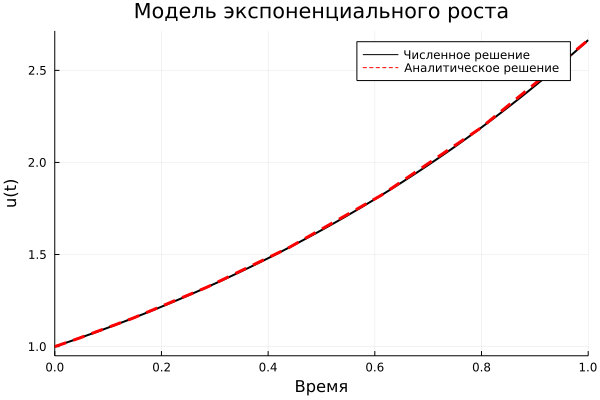

In [5]:
sol = solve(prob,abstol=1e-8,reltol=1e-8)
println(sol)
plot(sol, lw=2, color="black", title="Модель экспоненциального роста", xaxis="Время",yaxis="u(t)",label="Численное решение")
plot!(sol.t, t->1.0*exp(a*t),lw=3,ls=:dash,color="red",label="Аналитическое решение")

In [6]:
function lorenz!(du,u,p,t)
    σ,ρ,β = p
    du[1] = σ*(u[2]-u[1])
    du[2] = u[1]*(ρ-u[3]) - u[2]
    du[3] = u[1]*u[2] - β*u[3]
end

lorenz! (generic function with 1 method)

In [7]:
# задаём начальное условие:
u0 = [1.0,0.0,0.0]
# задаём знанчения параметров:
p = (10,28,8/3)
# задаём интервал времени:
tspan = (0.0,100.0)
# решение:
prob = ODEProblem(lorenz!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 1300-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.003262408518896374
   0.009058077168386882
   0.01695647153663815
   0.027689960628879868
   0.041856351821061455
   0.06024041060823337
   0.08368540639551347
   0.11336498387118026
   0.14862180073662978
   0.18703976749175058
   ⋮
  98.96497153541497
  99.06972158785038
  99.15733553336672
  99.25227436435598
  99.34990050231407
  99.47329750836677
  99.56888278883171
  99.68067056500875
  99.7698930548574
  99.86396908592394
  99.9520070464327
 100.0
u: 1300-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799189e-8]
 [0.9961045497425811, 0.010965399721242457, 2.1469553658389193e-6]
 [0.9693591566959717, 0.089770627357676, 0.0001438019004555601]
 [0.9242043510496474, 0.24228916412927515, 0.0010461626

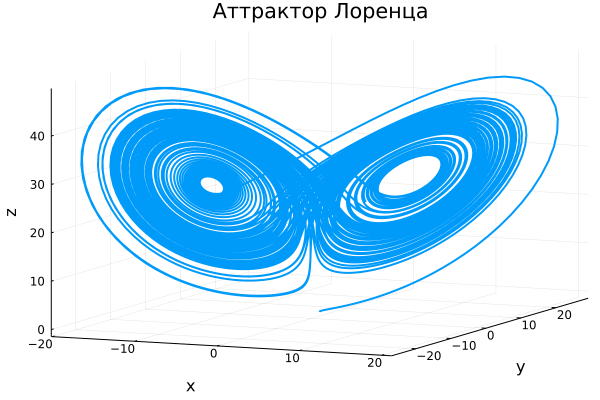

In [8]:
plot(sol, vars=(1,2,3), lw=2, title="Аттрактор Лоренца", xaxis="x",yaxis="y", zaxis="z",legend=false)

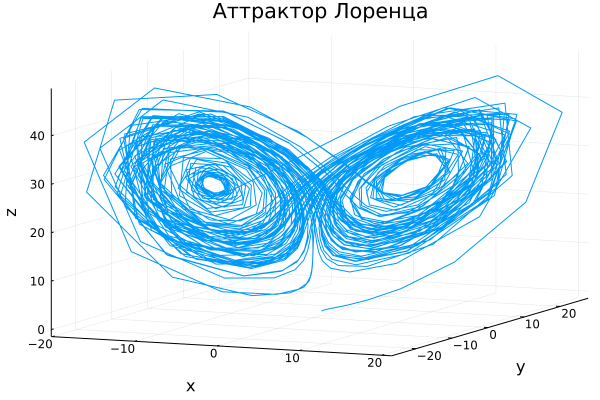

In [9]:
plot(sol,vars=(1,2,3),denseplot=false, lw=1, title="Аттрактор Лоренца", xaxis="x",yaxis="y", zaxis="z",legend=false)

In [10]:
import Pkg
Pkg.add("ParameterizedFunctions")

   Resolving package versions...
  No Changes to `C:\Users\Xiaomi\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\Xiaomi\.julia\environments\v1.6\Manifest.toml`


In [11]:
using ParameterizedFunctions

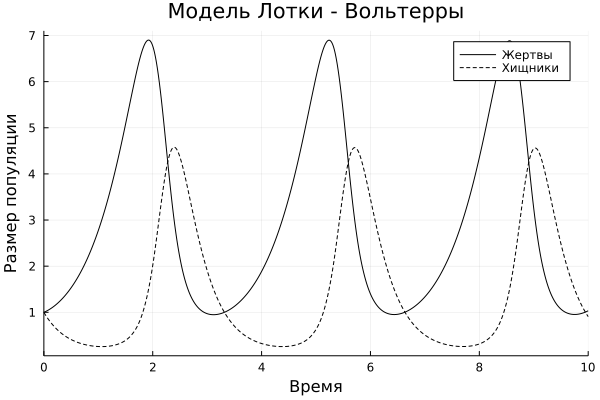

In [12]:
lv! = @ode_def LotkaVolterra begin
dx = a*x - b*x*y
dy = -c*y + d*x*y
end a b c d
# задаём начальное условие:
u0 = [1.0,1.0]
# задаём знанчения параметров:
p = (1.5,1.0,3.0,1.0)
# задаём интервал времени:
tspan = (0.0,10.0)
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)
plot(sol, label = ["Жертвы" "Хищники"], color="black", ls=[:solid :dash], title="Модель Лотки - Вольтерры", xaxis="Время",yaxis="Размер популяции")

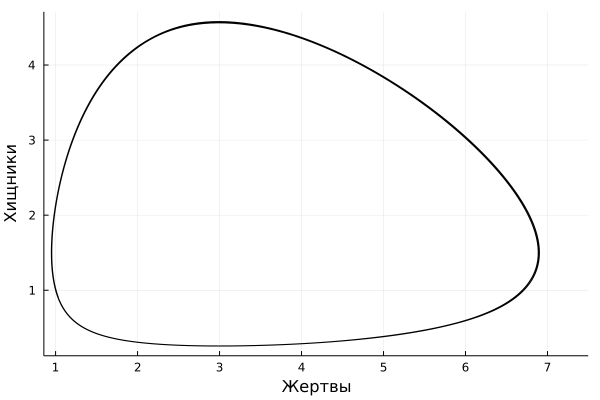

In [13]:
plot(sol,vars=(1,2), color="black", xaxis="Жертвы",yaxis="Хищники", legend=false)

In [14]:
function maltus(u0, b, c, tmax)
    n=tmax
    a = b-c
    f1(u,p,t) = a*u
    tspan1 = (0.0,n)
    prob1 = ODEProblem(f1,u0,tspan1)
    sol1 = solve(prob1)
    anim = @animate for i in 0:0.01:n
        a = b-c
        f(u,p,t) = a*u
        tspan = (0.0,i)
        prob = ODEProblem(f,u0,tspan)
        sol = solve(prob)
        plot(xlim=(0,n),ylim=(0,maximum(sol1)), sol, linewidth=5,title="Модель Мальтуса", xaxis="Время",yaxis="численность",label="u(t)")
    end
    gif(anim,"maltus.gif")
end

maltus (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = C:\Users\Xiaomi\OneDrive\Документы\work\2021-2022\Практикум по моделированию\lab6\maltus.gif
└ @ Plots C:\Users\Xiaomi\.julia\packages\Plots\PomtQ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Xiaomi\\OneDrive\\Документы\\work\\2021-2022\\Практикум по моделированию\\lab6\\maltus.gif")
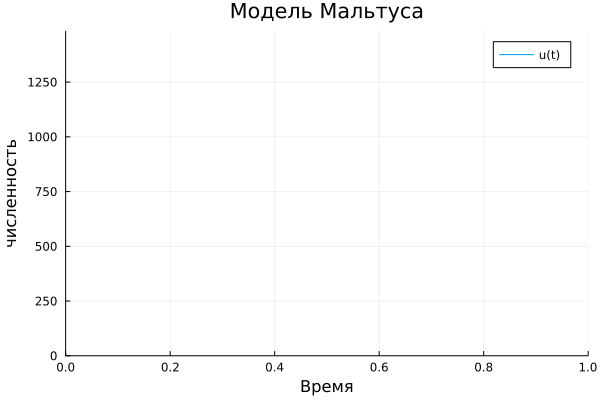

In [15]:
maltus(10, 10, 5, 1)

┌ Info: Saved animation to 
│   fn = C:\Users\Xiaomi\OneDrive\Документы\work\2021-2022\Практикум по моделированию\lab6\maltus.gif
└ @ Plots C:\Users\Xiaomi\.julia\packages\Plots\PomtQ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Xiaomi\\OneDrive\\Документы\\work\\2021-2022\\Практикум по моделированию\\lab6\\maltus.gif")
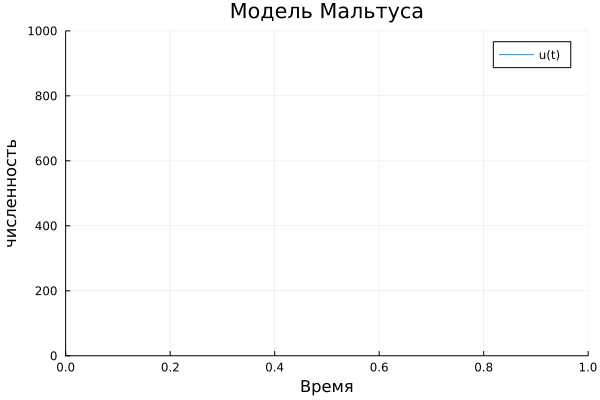

In [16]:
maltus(1000, 0, 2, 1)

In [17]:
function logist(u0, r, k, tmax)
    if r<0 || k<0
        println("incorrect operands")
    else
    n=tmax
    f1(u,p,t) = r*u*(1-u/k)
    tspan1 = (0.0,n)
    prob1 = ODEProblem(f1,u0,tspan1)
    sol1 = solve(prob1)
    anim = @animate for i in 0:0.01:n
        f(u,p,t) = r*u*(1-u/k)
        tspan = (0.0,i)
        prob = ODEProblem(f,u0,tspan)
        sol = solve(prob)
        plot(xlim=(0,n),ylim=(0,maximum(sol1)), sol, linewidth=5,title="Логистическая модель", xaxis="Время",yaxis="численность",label="u(t)")
    end
    gif(anim,"logist.gif")
    end
end

logist (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = C:\Users\Xiaomi\OneDrive\Документы\work\2021-2022\Практикум по моделированию\lab6\logist.gif
└ @ Plots C:\Users\Xiaomi\.julia\packages\Plots\PomtQ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Xiaomi\\OneDrive\\Документы\\work\\2021-2022\\Практикум по моделированию\\lab6\\logist.gif")
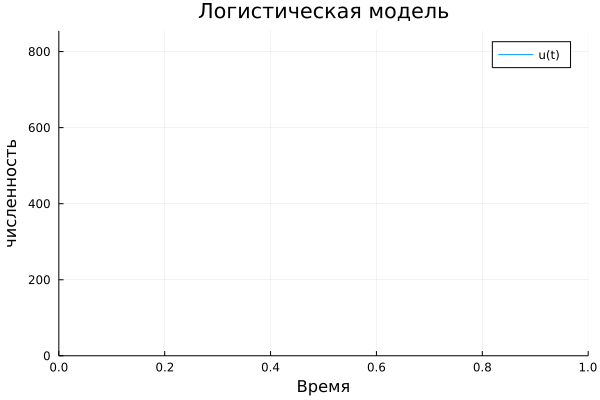

In [18]:
logist(10, 5, 2000, 1)

┌ Info: Saved animation to 
│   fn = C:\Users\Xiaomi\OneDrive\Документы\work\2021-2022\Практикум по моделированию\lab6\logist.gif
└ @ Plots C:\Users\Xiaomi\.julia\packages\Plots\PomtQ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Xiaomi\\OneDrive\\Документы\\work\\2021-2022\\Практикум по моделированию\\lab6\\logist.gif")
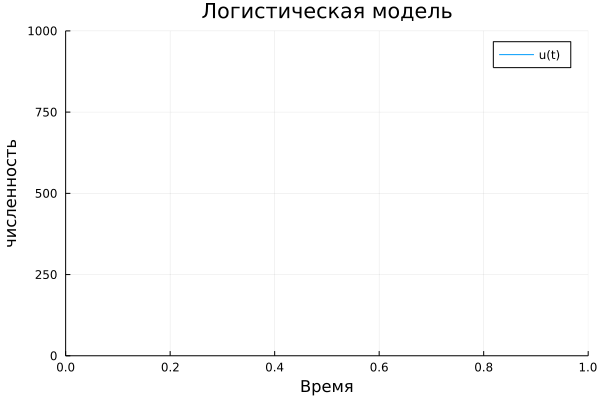

In [19]:
logist(1, 100, 1000, 1)

In [41]:
function sir(n, i0, r0, b, v, tmax)
    s0=n-i0-r0
    function syst(du,u,p,t)
        du[1]=-b*u[1]*u[2]
        du[2]=b*u[1]*u[2]-v*u[2]
        du[3]=v*u[2]
    end
    u0=[s0,i0,r0]
    tspan1=(0.0,tmax)
    prob1=ODEProblem(syst,u0,tspan1)
    sol1=solve(prob1)
    anim = @animate for i in 1:tmax
        tspan=(0.0,i)
        prob=ODEProblem(syst,u0,tspan)
        sol=solve(prob)
        plot(xlim=(0,tmax),ylim=(0,maximum(sol1)), sol, linewidth=5,title="Модель SIR", xaxis="Время",yaxis="численность",label=["s" "i" "r"])
    end
    gif(anim,"sir.gif")
end

sir (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = C:\Users\Xiaomi\OneDrive\Документы\work\2021-2022\Практикум по моделированию\lab6\sir.gif
└ @ Plots C:\Users\Xiaomi\.julia\packages\Plots\PomtQ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Xiaomi\\OneDrive\\Документы\\work\\2021-2022\\Практикум по моделированию\\lab6\\sir.gif")
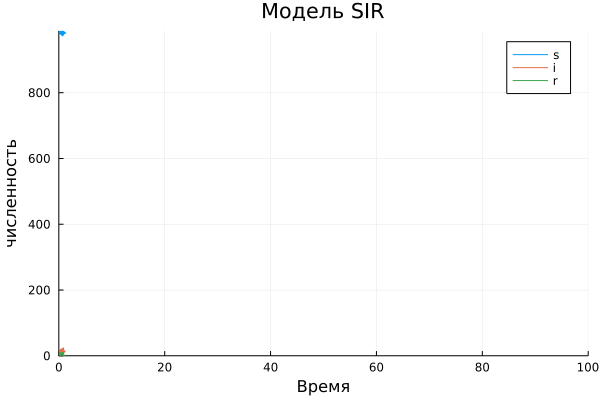

In [47]:
sir(1000, 10, 2, 0.0008, 0.2, 100)

In [51]:
function seir(n, i0, e0, r0, b, d, v, tmax)
    s0=n-i0-e0-r0
    function sys(du,u,p,t)
        du[1]=-b*u[1]*u[3]/n
        du[2]=b*u[1]*u[3]/n-d*u[2]
        du[3]=d*u[2]-v*u[3]
        du[4]=v*u[3]
    end
    u0=[s0,i0,e0,r0]
    tspan1=(0.0,tmax)
    prob1=ODEProblem(sys,u0,tspan1)
    sol1=solve(prob1)
    anim = @animate for i in 1:tmax
        tspan=(0.0,i)
        prob=ODEProblem(sys,u0,tspan)
        sol=solve(prob)
        plot(xlim=(0,tmax),ylim=(0,maximum(sol1)), sol, linewidth=5,title="Модель SEIR", xaxis="Время",yaxis="численность",label=["s" "e" "i" "r"])
    end
    gif(anim,"seir.gif")
end

seir (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = C:\Users\Xiaomi\OneDrive\Документы\work\2021-2022\Практикум по моделированию\lab6\seir.gif
└ @ Plots C:\Users\Xiaomi\.julia\packages\Plots\PomtQ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Xiaomi\\OneDrive\\Документы\\work\\2021-2022\\Практикум по моделированию\\lab6\\seir.gif")
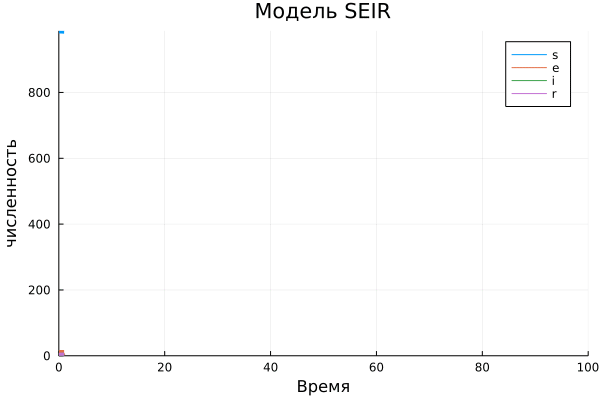

In [52]:
seir(1000, 10, 1, 2, 0.8, 0.1, 0.2, 100)

In [91]:
function lv(x0, y0, tmax)
    n=tmax
    a=2
    c=1
    d=5
    x=zeros(1,tmax)
    y=zeros(1,tmax)
    x[1]=x0
    y[1]=y0
    anim = @animate for i in 1:n-1
        x[i+1]=a*x[i]*(1-x[i])-x[i]*y[i]
        y[i+1]=-c*y[i]+d*x[i]*y[i]
        plot(xlim=(0,n),ylim=(0,10), x[1:i],title="Модель Лотки-Вольтерры", xaxis="Время",yaxis="численность",label="X1")
        plot!(y[1:i], label="X2")
    end
    gif(anim,"lv.gif")
end

lv (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = C:\Users\Xiaomi\OneDrive\Документы\work\2021-2022\Практикум по моделированию\lab6\lv.gif
└ @ Plots C:\Users\Xiaomi\.julia\packages\Plots\PomtQ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Xiaomi\\OneDrive\\Документы\\work\\2021-2022\\Практикум по моделированию\\lab6\\lv.gif")
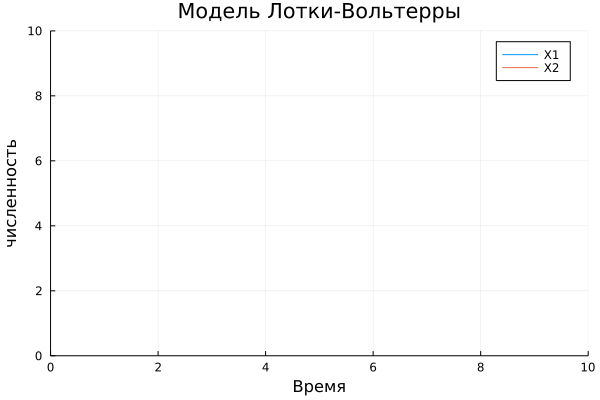

In [114]:
lv(0.744, 0.6, 10)

In [139]:
function m6(x0, y0, a, b, tmax)
    function syss(du,u,p,t)
        du[1]=a*u[1]-b*u[1]*u[2]
        du[2]=a*u[2]-b*u[1]*u[2]
    end
    u0=[x0,y0]
    tspan1=(0.0,tmax)
    prob1=ODEProblem(syss,u0,tspan1)
    sol1=solve(prob1)
    anim = @animate for i in 0:0.01:tmax
        tspan=(0.0,i)
        prob=ODEProblem(syss,u0,tspan)
        sol=solve(prob)
        plot(xlim=(0,tmax),ylim=(0,maximum(sol1)), sol, linewidth=5,title="отбор на основе конкурентных отношений", xaxis="Время",yaxis="значение",label=["x" "y"])
    end
    gif(anim,"m6.gif")
    plot(sol1,vars=(1,2), color="black", xaxis="x",yaxis="y", legend=false)
end

m6 (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = C:\Users\Xiaomi\OneDrive\Документы\work\2021-2022\Практикум по моделированию\lab6\m6.gif
└ @ Plots C:\Users\Xiaomi\.julia\packages\Plots\PomtQ\src\animation.jl:114


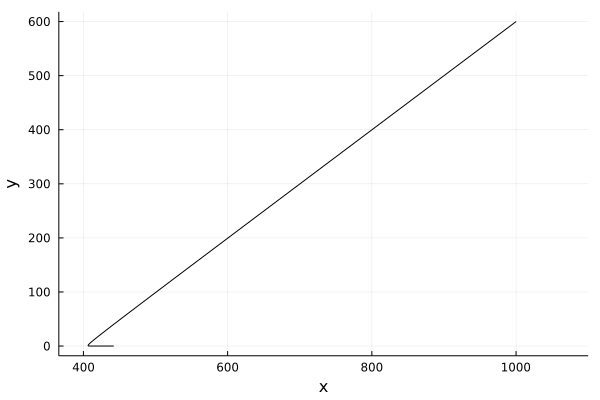

In [140]:
m6(1000, 600, 0.1, 0.1, 1)

In [148]:
function m7(x0, y0, w, tmax)
    function sy(du,u,p,t)
        du[1]=u[2]
        du[2]=-w*w*u[1]
    end
    u0=[x0,y0]
    tspan1=(0.0,tmax)
    prob1=ODEProblem(sy,u0,tspan1)
    sol1=solve(prob1)
    anim = @animate for i in 0:tmax
        tspan=(0.0,i)
        prob=ODEProblem(sy,u0,tspan)
        sol=solve(prob)
        plot(xlim=(0,tmax),ylim=(minimum(sol1)-1,maximum(sol1)+1), sol, linewidth=5,title="консервативный осциллятор", xaxis="Время",yaxis="значение",label=["x" "y"])
    end
    gif(anim,"m7.gif")
    plot(sol1,vars=(1,2), color="black", xaxis="x",yaxis="y", legend=false)
end

m7 (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = C:\Users\Xiaomi\OneDrive\Документы\work\2021-2022\Практикум по моделированию\lab6\m7.gif
└ @ Plots C:\Users\Xiaomi\.julia\packages\Plots\PomtQ\src\animation.jl:114


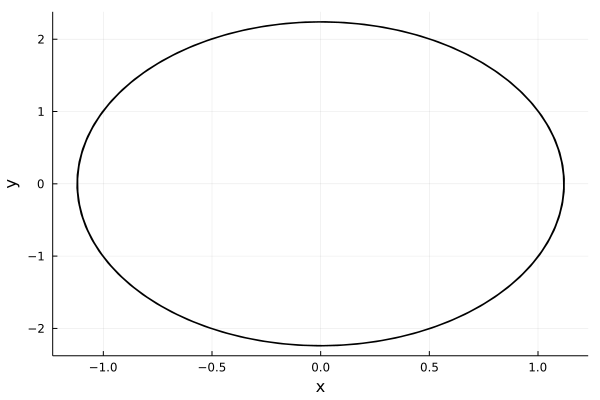

In [149]:
m7(1,1,2,50)

In [150]:
function m8(x0, y0, g, w, tmax)
    function syy(du,u,p,t)
        du[1]=u[2]
        du[2]=-w*w*u[1]-g*u[2]
    end
    u0=[x0,y0]
    tspan1=(0.0,tmax)
    prob1=ODEProblem(syy,u0,tspan1)
    sol1=solve(prob1)
    anim = @animate for i in 0:tmax
        tspan=(0.0,i)
        prob=ODEProblem(syy,u0,tspan)
        sol=solve(prob)
        plot(xlim=(0,tmax),ylim=(minimum(sol1)-1,maximum(sol1)+1), sol, linewidth=5,title="Осциллятор", xaxis="Время",yaxis="значение",label=["x" "y"])
    end
    gif(anim,"m8.gif")
    plot(sol1,vars=(1,2), color="black", xaxis="x",yaxis="y", legend=false)
end

m8 (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = C:\Users\Xiaomi\OneDrive\Документы\work\2021-2022\Практикум по моделированию\lab6\m8.gif
└ @ Plots C:\Users\Xiaomi\.julia\packages\Plots\PomtQ\src\animation.jl:114


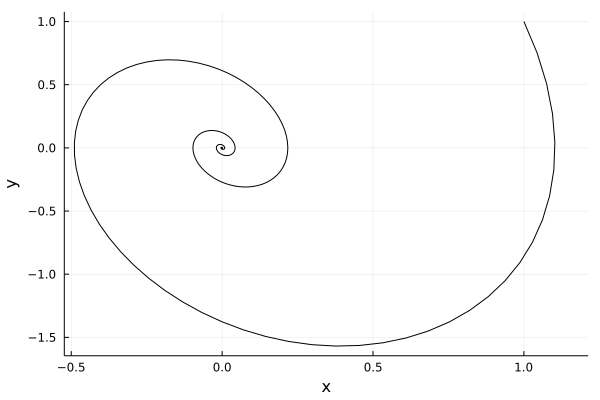

In [151]:
m8(1,1,1,2,50)